In [1]:
import matplotlib.pyplot as plt
import numpy as np 

# Exercise 1 - Calculate $\pi$

Using the **DSMC method**, calculate the value of **$\pi$**.


**Approach:**
In order to do this, create a 2-dimensional domain (defined by the coordinates $x_{min}, x_{max}, y_{min}, y_{max}$) and launch a number P of particles at random locations within. Check which particles lie inside a circle with radius $$ \frac{x_{max}-x_{min}}{2}, $$ where $x_{min}, x_{max}$ are the x-limits of your 2D domain. 

Get your value for $\pi$ by using the following formula:
$\pi = \frac{4 \cdot n_{inside}}{P},$ where $n_{inside}$ is the number of particles inside the circle and $P$ is the total number of particles.

**a)** Play around with the number of particles and plot your calculated value as a function of this number. 

**b)** Also plot the difference between the value you obtained for $\pi$ and the real one (as a function of P). 

**c)** Make a plot for your domain, highlighting the particles that are inside the circle.

In [20]:
# Number of Particles 
P = 10000000

# Random position (equally distributed inside square -1, 1) for P amount of Particle 
# einzelne Monte-Carlo Estimation with many P 
x = np.random.uniform(-1, 1, P)
y = np.random.uniform(-1, 1, P)

# Test whether inside circle 
inside = x**2 + y**2 <= 1.0
n_inside = np.sum(inside)

# Pi estimation (points inside circle/points inside square = pi/4)
pi_est = 4 * n_inside / P

# Error 
pi_err = pi_est - np.pi

print("pi (Monte Carlo) =", pi_est)
print("Error =", pi_err)



pi (Monte Carlo) = 3.1424992
Error = 0.000906546410206932


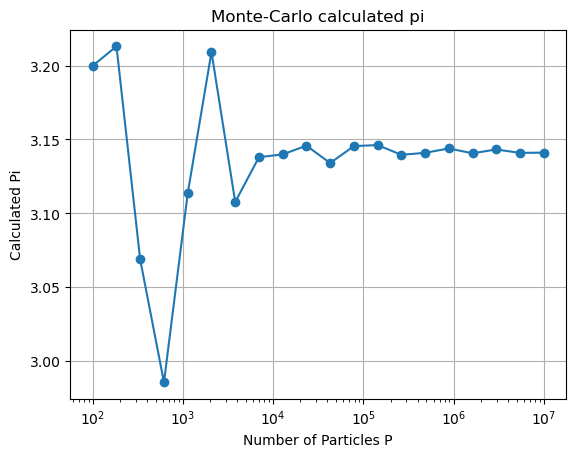

In [22]:
# logarithm for Monte-Carlo 
P_values = np.logspace(2, 7, 20, dtype=int)
pi_values = []

# Many independent Monte-Carlo estimations, each with different P 
for P in P_values:
    x = np.random.uniform(-1, 1, P)
    y = np.random.uniform(-1, 1, P)
    inside = x**2 + y**2 <= 1
    pi_values.append(4 * np.sum(inside) / P)

plt.plot(P_values, pi_values, marker='o')
plt.xscale('log')
plt.xlabel("Number of Particles P")
plt.ylabel("Calculated Pi")
plt.title("Monte-Carlo calculated pi")
plt.grid()
plt.show()


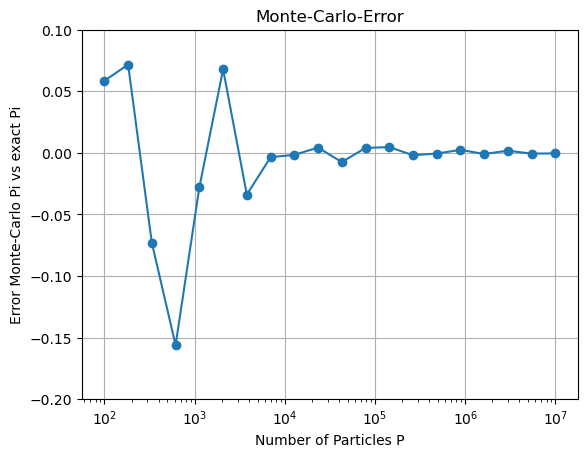

In [27]:
# Difference Monte-Carlo Pi and real Pi 
error = np.array(pi_values) - np.pi

plt.plot(P_values, error, marker='o')
plt.xscale('log')
plt.xlabel("Number of Particles P")
plt.ylabel("Error Monte-Carlo Pi vs exact Pi")
plt.title("Monte-Carlo-Error")
plt.ylim(-0.20, 0.1)
plt.grid()
plt.show()


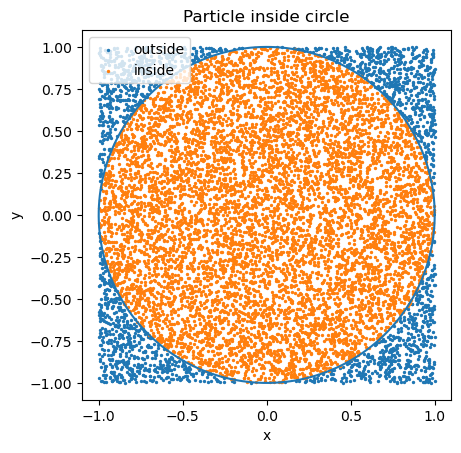

In [32]:
P = 10000

x = np.random.uniform(-1, 1, P)
y = np.random.uniform(-1, 1, P)
inside = x**2 + y**2 <= 1 # Randpunkte are inside, seldom case, because points small 

# Angle to calculate circle, later with cos and sin 
theta = np.linspace(0, 2*np.pi, 400)

plt.scatter(x[~inside], y[~inside], s=2, label="outside") # NOT inside 
plt.scatter(x[inside], y[inside], s=2, label="inside")
plt.plot(np.cos(theta), np.sin(theta))
plt.gca().set_aspect("equal") # get current axis, so its a circle, not ellipse 
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Particle inside circle")
plt.show()


# Exercise 2 - Metropolis-Hastings

Using the Metropolis-Hastings algorithm, find the standard deviation $\sigma$ and mean value $\mu$ of a random Gaussian distribution. The data to be used for this exercise can be found in the file "input_data.txt".

**Approach (i.e. how the Metropolis-Hastings algorithm looks like):** Start with an initial guess for your standard deviation and mean (you can use the built-in numpy functions for this). 

Generate new values by adding some random noise to the previous/initial guess. Get the noise from a probability distribution. Use for example a Gaussian distribution which you can get via the function

Estimated mu = 6.42799376561129
Estimated sigma = 15.75913346192761


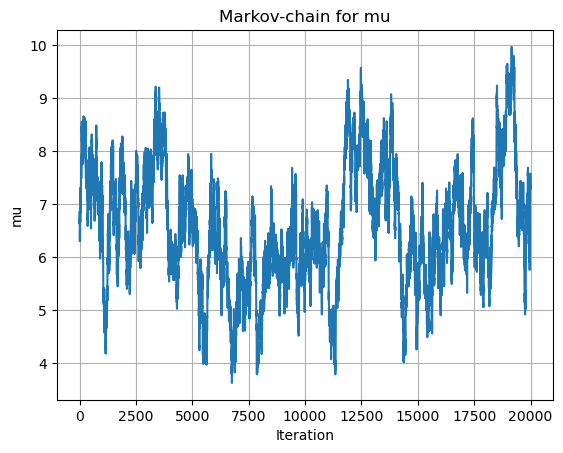

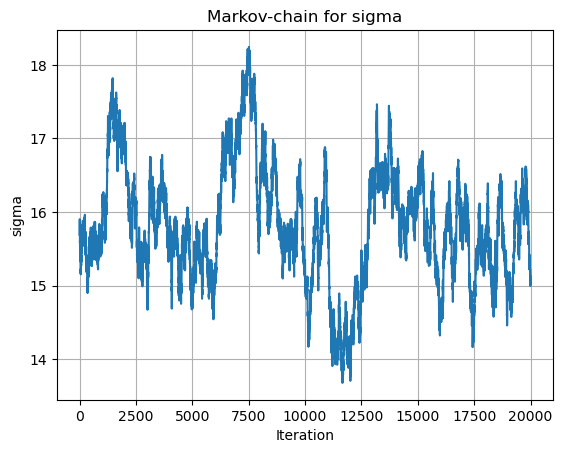

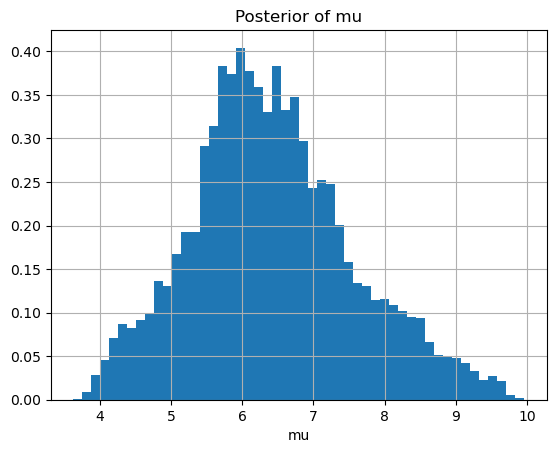

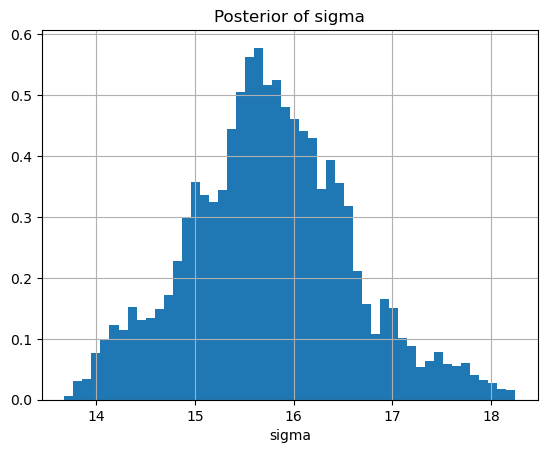

In [35]:
from scipy.stats import norm
# norm(parameter, sigma_m).rvs()


data = np.loadtxt("input_data (1).txt")
N = len(data)

# log likelihood function, sigma has to be positive, else negativ infinity 
def log_likelihood(mu, sigma, data):
    if sigma <= 0:
        return -np.inf
    return -N * np.log(sigma) - 1 / (2 * sigma**2) * np.sum((data - mu)**2) 

# length Markov chain 
n_steps = 20000

# Initial guess (from numpy)
mu_current = np.mean(data)
sigma_current = np.std(data)

# log likelihood for initial condition 
logL_current = log_likelihood(mu_current, sigma_current, data)

# Step sizes for MCMC 
sigma_mu = 0.1
sigma_sigma = 0.05

mu_chain = []
sigma_chain = []

# For each iteration new proposal: either accept or decline 
for i in range(n_steps):
    # Proposals new point near current one; proposal symmetric distribution 
    mu_proposal = norm(mu_current, sigma_mu).rvs()
    sigma_proposal = norm(sigma_current, sigma_sigma).rvs()

    # likelihood of proposal 
    logL_proposal = log_likelihood(mu_proposal, sigma_proposal, data)

    # How likely is Acceptance, alpha > 1 always accepted [in order to escape local minima] 
    # Sometimes bad points also get accepted in order to escape local minima 
    alpha = np.exp(logL_proposal - logL_current)

    # random number [0,1] 
    # if proposal accepted 
    if np.random.rand() < alpha:
        mu_current = mu_proposal
        sigma_current = sigma_proposal
        logL_current = logL_proposal

    # if rejected, saved. Creates the Markov chain 
    mu_chain.append(mu_current)
    sigma_chain.append(sigma_current)
# reject first 20%: no dependence on initial condition 
burnin = int(0.2 * n_steps)

# Posterior mean and Bayes estimate 
mu_est = np.mean(mu_chain[burnin:])
sigma_est = np.mean(sigma_chain[burnin:])

print("Estimated mu =", mu_est)
print("Estimated sigma =", sigma_est)

plt.figure()
plt.plot(mu_chain)
plt.xlabel("Iteration")
plt.ylabel("mu")
plt.title("Markov-chain for mu")
plt.grid() 
plt.show()

plt.figure()
plt.plot(sigma_chain)
plt.xlabel("Iteration")
plt.ylabel("sigma")
plt.title("Markov-chain for sigma")
plt.grid() 
plt.show()

plt.figure()
plt.hist(mu_chain[burnin:], bins=50, density=True)
plt.xlabel("mu")
plt.title("Posterior of mu")
plt.grid() 
plt.show()

plt.figure()
plt.hist(sigma_chain[burnin:], bins=50, density=True)
plt.xlabel("sigma")
plt.title("Posterior of sigma")
plt.grid() 
plt.show()

from the scipy.stats package, where $sigma_m$ is the average step size. One can assume a value of 0.1 for this, or play around with this parameter and see what happens. Make sure your sigma isn't lower than zero, otherwise you will end up with NaNs or other weird values.

Compute the likelihood of your new values. Remember the likelihood formula from the lecture and apply it to your points. Compare the likelihood of the new and old values and accept the most relevant value. 

**Note:** Should the likelihood of your new value be lower than the older one, you can use the _acceptance-rejection criterion_ to determine which one to keep (see lecture slides and use a random _r_ value between 0 and 1).

Repeat until you converge on a value (ideally the same one as the values computed with the built-in functions).

For the following plots make sure to include the true values as well, i.e. overplot $\sigma$ and $\mu$ where relevant.

**a)** Plot $\mu$ as a function of the number of iterations.

**b)** Plot $\sigma$ as a function of the number of iterations.

**c)** Make a plot of the dataset you were given and overplot your best fit.

**d)** [OPTIONAL] Please repeat **a)**, **b)**, and **c)**, but this time use the emcee package discussed in Exercise Sheet 8. Do you get the same result as with your own implementation of an MCMC sampler? What is the difference between the sampler implemented by the emcee package and the Metropolis-Hastings algorithm?

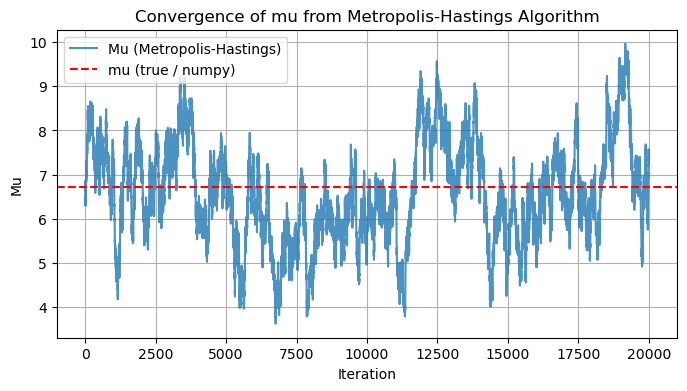

In [36]:
# True mu for comparison 
mu_true = np.mean(data)
plt.figure(figsize=(8, 4))

plt.plot(mu_chain, label="Mu (Metropolis-Hastings)", alpha=0.8)
plt.axhline(mu_true, color='red', linestyle='--', label="mu (true / numpy)")

plt.xlabel("Iteration")
plt.ylabel("Mu")
plt.title("Convergence of mu from Metropolis-Hastings Algorithm")
plt.legend()
plt.grid()
plt.show() 


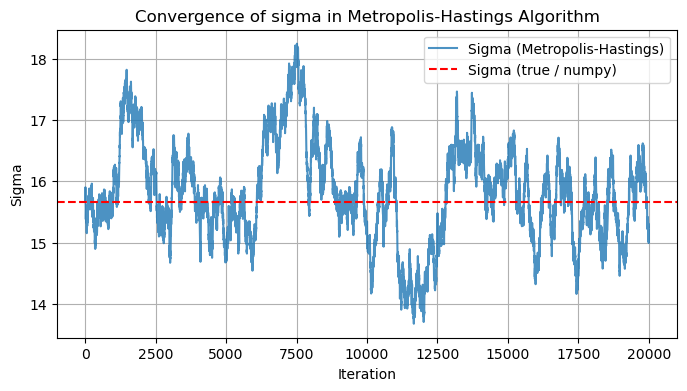

In [37]:
# True sigma value for comparison 
sigma_true = np.std(data) 

plt.figure(figsize=(8, 4))
plt.plot(sigma_chain, label="Sigma (Metropolis-Hastings)", alpha=0.8)
plt.axhline(sigma_true, color='red', linestyle='--', label="Sigma (true / numpy)")

plt.xlabel("Iteration")
plt.ylabel("Sigma")
plt.title("Convergence of sigma in Metropolis-Hastings Algorithm")
plt.legend()
plt.grid()
plt.show()


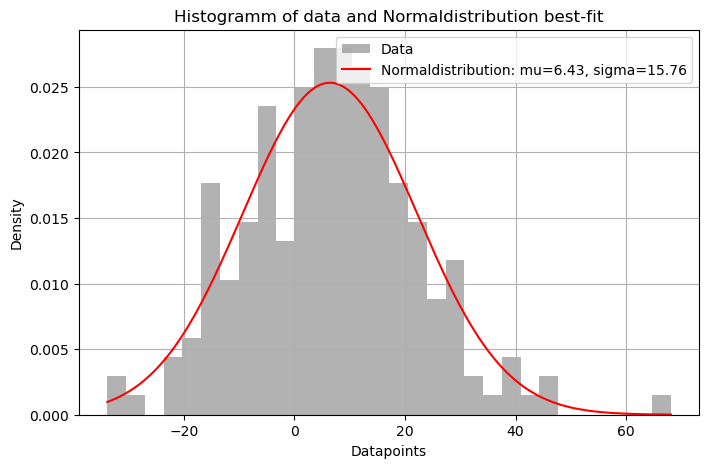

In [38]:
plt.figure(figsize=(8,5))
plt.hist(data, bins=30, density=True, alpha=0.6, color='gray', label="Data")

x = np.linspace(min(data), max(data), 500)
best_fit_pdf = norm.pdf(x, mu_est, sigma_est)  # Probability density function with estimated mu and sigma 

plt.plot(x, best_fit_pdf, 'r-', label=f'Normaldistribution: mu={mu_est:.2f}, sigma={sigma_est:.2f}')
plt.xlabel("Datapoints")
plt.ylabel("Density")
plt.title("Histogramm of data and Normaldistribution best-fit")
plt.legend()
plt.grid()
plt.show() 